In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
dfg = pd.read_csv('wat-r0-good.csv')
dfm = pd.read_csv('wat-r0-mals.csv')

In [6]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,7,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,26,26,6,6,1
1,87,0,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,6,26,5,6,1
2,88,0,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,5,26,4,6,1
3,89,0,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,4,26,3,6,1
4,90,0,2,0x1dc0,3,3,1,4,16,18,2,0,0,74,0,3,26,2,6,1


In [7]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,7,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,59,59,6,6,0
1,87,0,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,11,59,5,6,0
2,88,0,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,9,59,4,6,0
3,89,0,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,8,59,3,6,0
4,90,0,2,0x1dc0,3,3,1,4,16,18,2,0,0,74,0,6,59,2,6,0


In [8]:
df = dfg.append(dfm, ignore_index=True)

In [9]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,7,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,26,26,6,6,1
1,87,0,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,6,26,5,6,1
2,88,0,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,5,26,4,6,1
3,89,0,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,4,26,3,6,1
4,90,0,2,0x1dc0,3,3,1,4,16,18,2,0,0,74,0,3,26,2,6,1


In [10]:
df = df.sort_values('time')

In [11]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,7,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,26,26,6,6,1
64434,7,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,59,59,6,6,0
64435,87,0,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,11,59,5,6,0
1,87,0,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,6,26,5,6,1
2,88,0,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,5,26,4,6,1
64436,88,0,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,9,59,4,6,0
64437,89,0,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,8,59,3,6,0
3,89,0,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,4,26,3,6,1
64438,90,0,2,0x1dc0,3,3,1,4,16,18,2,0,0,74,0,6,59,2,6,0
4,90,0,2,0x1dc0,3,3,1,4,16,18,2,0,0,74,0,3,26,2,6,1


In [13]:
df.to_csv('wat-r0-pkt.csv',index=False)

In [14]:
df = pd.read_csv("wat-r0-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,7,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,26,26,6,6,1
1,7,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,59,59,6,6,0
2,87,0,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,11,59,5,6,0
3,87,0,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,6,26,5,6,1
4,88,0,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,5,26,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126529,3251514,0,1,0x4d2c0,3,0,0,4,16,29,13,0,0,3251494,10027,7,27,5,5,1
126530,3251515,0,1,0x4d2c0,3,1,1,4,16,29,13,0,0,3251494,10027,5,27,4,5,1
126531,3251516,0,1,0x4d2c0,3,2,1,4,16,29,13,0,0,3251494,10027,4,27,3,5,1
126532,3251517,0,1,0x4d2c0,3,3,1,4,16,29,13,0,0,3251494,10027,3,27,2,5,1


In [15]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,0.012492,-0.058415,0.031207,0.003004,-0.004692,-0.027505,-0.037795,-0.001448,0.028429,0.036593,0.057100,1.000000,0.980619,0.032618,0.017202,0.042512,0.057169,0.043136
outport,0.012492,1.000000,-0.807423,-0.027662,-0.004027,0.006302,-0.764696,-0.698778,-0.814781,-0.582338,0.887680,0.695625,0.012491,0.014904,0.284742,-0.082066,-0.159392,-0.036618,0.000591
inport,-0.058415,-0.807423,1.000000,-0.039182,0.025881,-0.040504,0.786654,0.720222,0.678458,0.272651,-0.831237,-0.617499,-0.058413,-0.059929,-0.253526,0.031216,0.120366,0.020539,-0.007993
packet_type,0.031207,-0.027662,-0.039182,1.000000,0.106333,-0.166415,-0.250392,-0.326589,0.063217,0.033306,-0.059212,-0.054420,0.031210,0.032709,0.054069,-0.034344,0.080512,-0.022276,0.001589
flit_id,0.003004,-0.004027,0.025881,0.106333,1.000000,0.055582,0.196079,0.196868,0.003280,0.009873,-0.015733,-0.003773,0.003001,0.003232,-0.045078,0.022078,-0.119308,0.020011,0.001713
flit_type,-0.004692,0.006302,-0.040504,-0.166415,0.055582,1.000000,-0.306869,-0.308104,-0.005133,-0.015452,0.024623,0.005904,-0.004696,-0.005059,0.058197,0.096879,-0.173145,-0.022933,-0.002681
vnet,-0.027505,-0.764696,0.786654,-0.250392,0.196079,-0.306869,1.000000,0.970692,0.771119,0.551179,-0.816888,-0.588558,-0.027505,-0.029048,-0.295769,0.092840,0.111703,0.027149,0.004677
vc,-0.037795,-0.698778,0.720222,-0.326589,0.196868,-0.308104,0.970692,1.000000,0.706532,0.503234,-0.751289,-0.540510,-0.037794,-0.038010,-0.284759,0.083149,0.099048,0.034636,0.003990
src_ni,-0.001448,-0.814781,0.678458,0.063217,0.003280,-0.005133,0.771119,0.706532,1.000000,0.847040,-0.888163,-0.682630,-0.001448,-0.002788,-0.260102,0.196960,0.140667,0.027098,0.004780
src_router,0.028429,-0.582338,0.272651,0.033306,0.009873,-0.015452,0.551179,0.503234,0.847040,1.000000,-0.619116,-0.447869,0.028426,0.029379,-0.150622,0.295633,0.092207,-0.012450,0.009751


In [16]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [17]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,2,0,0,0,3,2,8,23,7,3,0,6,6
1,2,0,0,0,3,2,8,23,7,3,0,6,6
2,0,2,3,0,0,4,16,0,0,74,0,5,6
3,0,2,3,0,0,4,16,0,0,74,0,5,6
4,0,2,3,1,1,4,16,0,0,74,0,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126529,0,1,3,0,0,4,16,0,0,3251494,10027,5,5
126530,0,1,3,1,1,4,16,0,0,3251494,10027,4,5
126531,0,1,3,2,1,4,16,0,0,3251494,10027,3,5
126532,0,1,3,3,1,4,16,0,0,3251494,10027,2,5


In [18]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.00,1.000000,0.0,0.0,0.741935,0.466667,0.000000,0.000000,0.208333,0.208333
1,1.0,0.0,0.0,0.00,1.000000,0.0,0.0,0.741935,0.466667,0.000000,0.000000,0.208333,0.208333
2,0.0,1.0,0.5,0.00,0.000000,1.0,1.0,0.000000,0.000000,0.000022,0.000000,0.166667,0.208333
3,0.0,1.0,0.5,0.00,0.000000,1.0,1.0,0.000000,0.000000,0.000022,0.000000,0.166667,0.208333
4,0.0,1.0,0.5,0.25,0.333333,1.0,1.0,0.000000,0.000000,0.000022,0.000000,0.125000,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126529,0.0,0.5,0.5,0.00,0.000000,1.0,1.0,0.000000,0.000000,1.000000,0.973495,0.166667,0.166667
126530,0.0,0.5,0.5,0.25,0.333333,1.0,1.0,0.000000,0.000000,1.000000,0.973495,0.125000,0.166667
126531,0.0,0.5,0.5,0.50,0.333333,1.0,1.0,0.000000,0.000000,1.000000,0.973495,0.083333,0.166667
126532,0.0,0.5,0.5,0.75,0.333333,1.0,1.0,0.000000,0.000000,1.000000,0.973495,0.041667,0.166667


In [19]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.807423,-0.027662,-0.004027,0.006302,-0.764696,-0.698778,0.887680,0.695625,0.012491,0.014904,-0.159392,-0.036618,0.000591
1,-0.807423,1.000000,-0.039182,0.025881,-0.040504,0.786654,0.720222,-0.831237,-0.617499,-0.058413,-0.059929,0.120366,0.020539,-0.007993
2,-0.027662,-0.039182,1.000000,0.106333,-0.166415,-0.250392,-0.326589,-0.059212,-0.054420,0.031210,0.032709,0.080512,-0.022276,0.001589
3,-0.004027,0.025881,0.106333,1.000000,0.055582,0.196079,0.196868,-0.015733,-0.003773,0.003001,0.003232,-0.119308,0.020011,0.001713
4,0.006302,-0.040504,-0.166415,0.055582,1.000000,-0.306869,-0.308104,0.024623,0.005904,-0.004696,-0.005059,-0.173145,-0.022933,-0.002681
5,-0.764696,0.786654,-0.250392,0.196079,-0.306869,1.000000,0.970692,-0.816888,-0.588558,-0.027505,-0.029048,0.111703,0.027149,0.004677
6,-0.698778,0.720222,-0.326589,0.196868,-0.308104,0.970692,1.000000,-0.751289,-0.540510,-0.037794,-0.038010,0.099048,0.034636,0.003990
7,0.887680,-0.831237,-0.059212,-0.015733,0.024623,-0.816888,-0.751289,1.000000,0.870636,0.036592,0.038942,-0.133555,-0.011601,-0.000611
8,0.695625,-0.617499,-0.054420,-0.003773,0.005904,-0.588558,-0.540510,0.870636,1.000000,0.057100,0.061226,-0.145873,-0.038781,0.007628
9,0.012491,-0.058413,0.031210,0.003001,-0.004696,-0.027505,-0.037794,0.036592,0.057100,1.000000,0.980619,0.042513,0.057169,0.043136


In [20]:
train_Y = df['target']

In [21]:
train_Y

0         1
1         0
2         0
3         1
4         1
         ..
126529    1
126530    1
126531    1
126532    1
126533    1
Name: target, Length: 126534, dtype: int64

In [22]:
pca = PCA(0.95)

In [23]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
principal_components = pca.transform(train_X)
principal_components

array([[ 1.02944382,  0.79722113,  0.23940207, ...,  0.72840202,
        -0.16527256,  0.13280518],
       [ 1.02944382,  0.79722113,  0.23940207, ...,  0.72840202,
        -0.16527256,  0.13280518],
       [-1.1791668 ,  0.70838598,  0.06590871, ..., -0.07605631,
         0.14135726,  0.01976567],
       ...,
       [-0.95260042, -0.70342411, -0.10112992, ...,  0.03693956,
        -0.16816484,  0.02585347],
       [-0.96319205, -0.71893504, -0.26701797, ..., -0.00907678,
        -0.16331992,  0.01447397],
       [-0.95449778, -0.71799674, -0.32256548, ...,  0.13366904,
        -0.17132468,  0.00902861]])

In [25]:
pca.explained_variance_ratio_

array([0.55514798, 0.11536978, 0.10392243, 0.08199669, 0.05236321,
       0.03101139, 0.02270246])

In [26]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

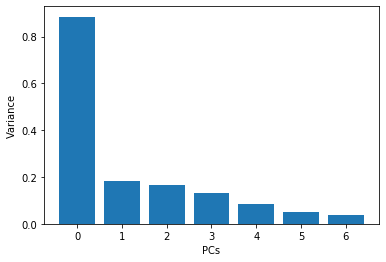

In [27]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [28]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6
0,1.029444,0.797221,0.239402,-0.050673,0.728402,-0.165273,0.132805
1,1.029444,0.797221,0.239402,-0.050673,0.728402,-0.165273,0.132805
2,-1.179167,0.708386,0.065909,-0.595551,-0.076056,0.141357,0.019766
3,-1.179167,0.708386,0.065909,-0.595551,-0.076056,0.141357,0.019766
4,-1.170473,0.709324,0.010361,-0.214364,0.066690,0.133352,0.014320
...,...,...,...,...,...,...,...
126529,-0.950703,-0.688851,0.120306,-0.619347,-0.059790,-0.165005,0.042678
126530,-0.942009,-0.687913,0.064758,-0.238161,0.082956,-0.173010,0.037233
126531,-0.952600,-0.703424,-0.101130,-0.065195,0.036940,-0.168165,0.025853
126532,-0.963192,-0.718935,-0.267018,0.107772,-0.009077,-0.163320,0.014474


In [29]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,target
0,1.029444,0.797221,0.239402,-0.050673,0.728402,-0.165273,0.132805,1
1,1.029444,0.797221,0.239402,-0.050673,0.728402,-0.165273,0.132805,0
2,-1.179167,0.708386,0.065909,-0.595551,-0.076056,0.141357,0.019766,0
3,-1.179167,0.708386,0.065909,-0.595551,-0.076056,0.141357,0.019766,1
4,-1.170473,0.709324,0.010361,-0.214364,0.066690,0.133352,0.014320,1
...,...,...,...,...,...,...,...,...
126529,-0.950703,-0.688851,0.120306,-0.619347,-0.059790,-0.165005,0.042678,1
126530,-0.942009,-0.687913,0.064758,-0.238161,0.082956,-0.173010,0.037233,1
126531,-0.952600,-0.703424,-0.101130,-0.065195,0.036940,-0.168165,0.025853,1
126532,-0.963192,-0.718935,-0.267018,0.107772,-0.009077,-0.163320,0.014474,1


In [30]:
final_df.corr()

,0,1,2,3,4,5,6,target
0,1.000000e+00,-5.222311e-15,1.019960e-14,-4.927901e-15,1.068973e-14,1.434858e-14,-1.051623e-14,-0.000063
1,-5.222311e-15,1.000000e+00,-6.740038e-16,7.210929e-16,6.427520e-16,-9.838341e-16,-1.269760e-15,0.006339
2,1.019960e-14,-6.740038e-16,1.000000e+00,2.333903e-15,2.741141e-16,-5.074662e-15,3.927342e-15,-0.008348
3,-4.927901e-15,7.210929e-16,2.333903e-15,1.000000e+00,-4.052537e-15,-1.958779e-15,1.429421e-15,-0.003596
4,1.068973e-14,6.427520e-16,2.741141e-16,-4.052537e-15,1.000000e+00,-2.330682e-15,-1.052804e-15,0.001155
5,1.434858e-14,-9.838341e-16,-5.074662e-15,-1.958779e-15,-2.330682e-15,1.000000e+00,-4.764601e-17,-0.002206
6,-1.051623e-14,-1.269760e-15,3.927342e-15,1.429421e-15,-1.052804e-15,-4.764601e-17,1.000000e+00,-0.003548
target,-6.325804e-05,6.338963e-03,-8.347556e-03,-3.596271e-03,1.155011e-03,-2.205930e-03,-3.547731e-03,1.000000


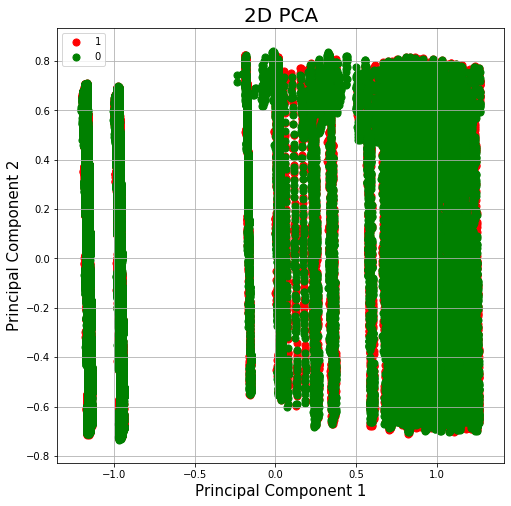

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [32]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,2,0,0,0,3,2,8,0,0,23,7,3,0,26,26,6,6,1
1,2,0,0,0,3,2,8,0,0,23,7,3,0,59,59,6,6,0
2,0,2,3,0,0,4,16,18,2,0,0,74,0,11,59,5,6,0
3,0,2,3,0,0,4,16,18,2,0,0,74,0,6,26,5,6,1
4,0,2,3,1,1,4,16,18,2,0,0,74,0,5,26,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126529,0,1,3,0,0,4,16,29,13,0,0,3251494,10027,7,27,5,5,1
126530,0,1,3,1,1,4,16,29,13,0,0,3251494,10027,5,27,4,5,1
126531,0,1,3,2,1,4,16,29,13,0,0,3251494,10027,4,27,3,5,1
126532,0,1,3,3,1,4,16,29,13,0,0,3251494,10027,3,27,2,5,1


In [33]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [34]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [35]:
seed = 7
np.random.seed(seed)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [43]:
model = Sequential()

In [44]:
n_cols = train_X.shape[1]
n_cols

13

In [45]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [47]:
model.fit(x_train, y_train, epochs=30, validation_split=0.4)

Train on 51625 samples, validate on 34418 samples
Epoch 1/30
51625/51625 [==============================] - 6s 123us/step - loss: 0.2498 - accuracy: 0.5136 - val_loss: 0.2497 - val_accuracy: 0.5197
Epoch 2/30
51625/51625 [==============================] - 7s 126us/step - loss: 0.2496 - accuracy: 0.5163 - val_loss: 0.2496 - val_accuracy: 0.5194
Epoch 3/30
51625/51625 [==============================] - 6s 125us/step - loss: 0.2495 - accuracy: 0.5196 - val_loss: 0.2494 - val_accuracy: 0.5227
Epoch 4/30
51625/51625 [==============================] - 7s 144us/step - loss: 0.2493 - accuracy: 0.5252 - val_loss: 0.2493 - val_accuracy: 0.5244
Epoch 5/30
51625/51625 [==============================] - 7s 139us/step - loss: 0.2492 - accuracy: 0.5284 - val_loss: 0.2491 - val_accuracy: 0.5213
Epoch 6/30
51625/51625 [==============================] - 8s 150us/step - loss: 0.2490 - accuracy: 0.5322 - val_loss: 0.2488 - val_accuracy: 0.5276
Epoch 7/30
51625/51625 [==============================] - 6s 1

In [48]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [49]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.74%


In [50]:
dff = pd.read_csv('wat-r0-pkt.csv',nrows=500)

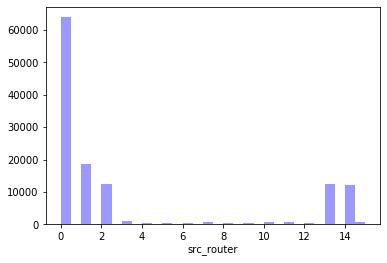

In [51]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

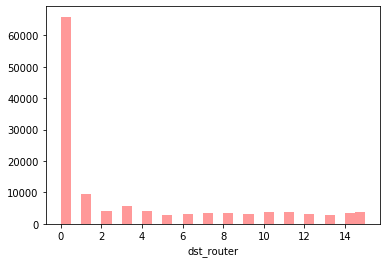

In [52]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

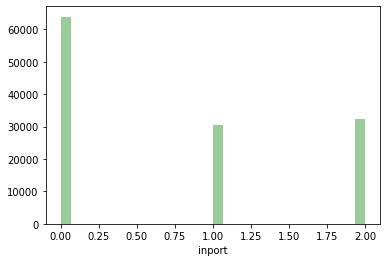

In [53]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

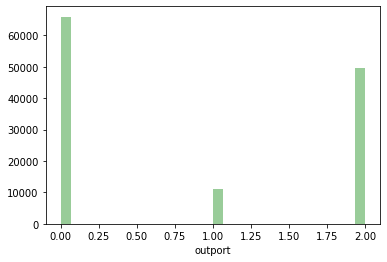

In [54]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

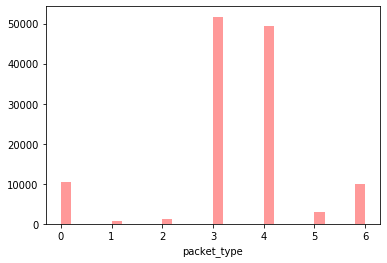

In [56]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')